# Which drug should you use?

DataViz Battle february 2019 from [Reddits Dataisbeautiful](https://www.reddit.com/r/dataisbeautiful/comments/an18kt/battle_dataviz_battle_for_the_month_of_february/).

Contrary to the more popular analysis on how bad drugs are, the following one takes a different approach. Instead of showing how bad drugs are and why you shouldn't take them, this analysis shows which one gives the most pleasure for your health. Not that you should do any, but hey, not judging.

Assumption: The data gives a linear and comparable scale of various kinds of harm, but also pleasure. For simplicity's sake the analysis will assume that the scale of harm and pleasure is comparable.

Goal: Finding the drug that gives you the most pleasure given the harm it does.

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
harm=pd.read_csv(r'https://github.com/DataChuggler/dataisbeautiful-reddit/blob/master/harm.csv')

In [12]:
harm['HP_1']=((harm['Pleasure']-harm['Mean_Physical_harm'])+(harm['Pleasure']-harm['Mean_Dependence'])+(harm['Pleasure']-harm['Mean_Social_harm']))

Drug use is all about that buzz. But which one gives you actually the most? A simple ranking of pleasure shows that the most pleasure is achieved with heroin and coccaine (see IMG_1). Don't even touch steroids or 4-MTA.

Text(0.5, 0.98, 'IMG_1: Amount of pleasure for each drug')

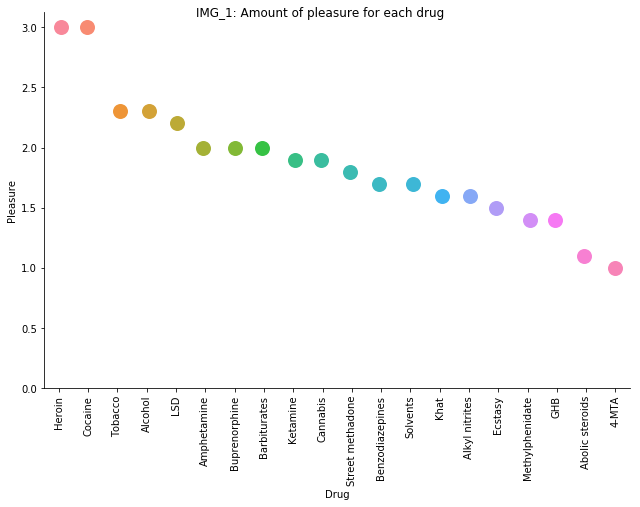

In [13]:
g = sns.catplot(x='Drug', y='Pleasure', data=harm.sort_values(by='Pleasure',ascending=False), kind='strip',s=15,height=6,aspect=1.5)
g.set_xticklabels(rotation=90)
g.set(ylim=(0, None))
g.fig.suptitle('IMG_1: Amount of pleasure for each drug')

Heroin and cocaine are all good and fun, but aren't there any other drugs that give you a better value for your health? Well, there are. By summing up the differences between pleasure and the three harm-indexes (physical harm, dependence and social harm) gives a rating of the pleasure given the harm the drug does:

HP_Index = Sum(pleasure - harm[1-3])

In [14]:
harm['HP_Index']=((harm['Pleasure']-harm['Mean_Physical_harm'])+(harm['Pleasure']-harm['Mean_Dependence'])+(harm['Pleasure']-harm['Mean_Social_harm']))

IMG_2 ranks the index for each drug. Cocain holds up fairly well while heroin gets bashed and moved further down the line. LSD on the other hand takes the leadership. It doesn't give as much pleasure, but the harm it does is far less severe than cocaine or other drugs.

Note the five drugs on the far right: Benzos, steroids, barbiturates, street methadone and 4-MTA do more harm then they give pleasure and should never be concidered.

Text(0.5, 0.98, 'IMG_2: Drugs that do the least harm given the pleasure')

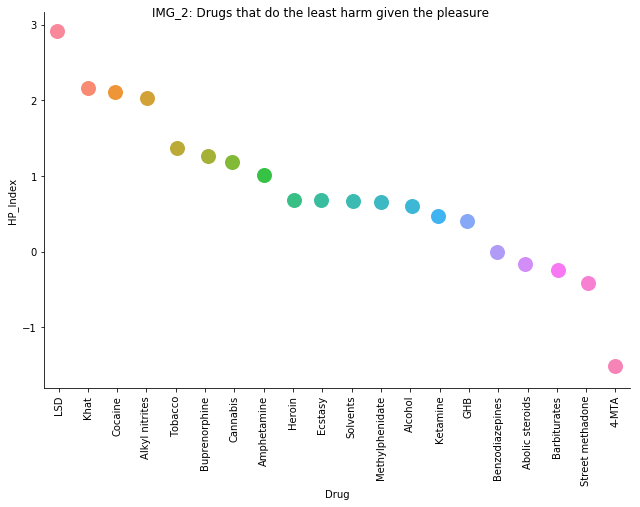

In [15]:
g = sns.catplot(x='Drug', y='HP_Index', data=harm.sort_values(by='HP_Index',ascending=False), kind='strip',s=15,height=6,aspect=1.5)
g.set_xticklabels(rotation=90)
g.fig.suptitle('IMG_2: Drugs that do the least harm given the pleasure')